In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seaborn.set_context('notebook')
seaborn.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [16, 8]

In [4]:
synonyms = pd.read_csv('../source/fixtures/ddf--open_numbers/ddf--synonyms--geo.csv')
wb_groups = pd.read_csv('../source/fixtures/wb_income_groups.csv')
on_income = pd.read_csv('../source/fixtures/on_income_groups.csv')

In [5]:
!ls ../source/fixtures/

brackets.csv				 neighbours_list.json
ddf--entities--coverage_type.csv	 on_income_groups.csv
ddf--entities--geo--on_income_level.csv  povcal_country_year.csv
ddf--entities--geo--wb_income_group.csv  wb_groups.csv
ddf--entities--geo--west_and_rest.csv	 wb_income_groups.csv
ddf--entities--geo--world_4regions.csv	 west_and_rest.csv
ddf--open_numbers


In [6]:
!ls ../datapoints/

ddf--datapoints--population--by--geo--time--income_bracket_50.csv
ddf--datapoints--population_percentage--by--geo--time--income_bracket_50.csv


In [7]:
!ls ../../income_mountain/

ddf--datapoints--income_mountain_50bracket_shape_for_log--by--country--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--g77_and_oecd_countries--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--global--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_3groups--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_groups--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--landlocked--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--main_religion_2008--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unhcr_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unicef_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_ldc--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--b

we have these groups and we need to have shapes for all of them:

- country.csv
- g77_and_oecd_countries.csv
- global.csv
- income_3groups.csv
- income_groups.csv
- landlocked.csv
- main_religion_2008.csv
- unhcr_region.csv
- unicef_region.csv
- un_sdg_ldc.csv
- un_sdg_region.csv
- west_and_rest.csv
- world_4region.csv
- world_6region.csv

income_groups and income_3groups comes from WB.

In [8]:
# load data
data = pd.read_csv('../datapoints/ddf--datapoints--population--by--geo--time--income_bracket_50.csv')

In [9]:
data

,geo,time,income_bracket_50,population
0,afg,1800,0,35
1,afg,1800,1,56
2,afg,1800,2,92
3,afg,1800,3,154
4,afg,1800,4,266
...,...,...,...,...
2447245,zwe,2050,45,443
2447246,zwe,2050,46,255
2447247,zwe,2050,47,139
2447248,zwe,2050,48,71


In [10]:
max_heights = dict()

In [11]:
max_heights['country'] = data.groupby('geo')['population'].max()

In [12]:
# income_groups and income_3groups
# we create long series by combining WB and ON groups

In [13]:
wb_groups

,geo,name,time,4 income groups (WB),3 income groups (WB)
0,afg,Afghanistan,1987,Low income,Low income
1,afg,Afghanistan,1988,Low income,Low income
2,afg,Afghanistan,1989,Low income,Low income
3,afg,Afghanistan,1990,Low income,Low income
4,afg,Afghanistan,1991,Low income,Low income
...,...,...,...,...,...
6659,zwe,Zimbabwe,2016,Low income,Low income
6660,zwe,Zimbabwe,2017,Low income,Low income
6661,zwe,Zimbabwe,2018,Lower middle income,Middle income
6662,zwe,Zimbabwe,2019,Lower middle income,Middle income


In [14]:
wb_groups.columns

Index(['geo', 'name', 'time', '4 income groups (WB)', '3 income groups (WB)'], dtype='object')

In [15]:
wb = wb_groups[['geo', 'time', "4 income groups (WB)"]].copy()

In [16]:
wb.columns = ['geo', 'time', 'level']

In [17]:
on_income.columns = ['geo', 'time', 'level']

In [18]:
on_map = {'Level 1': 'l1',
          'Level 2': 'l2',
          'Level 3': 'l3',
          'Level 4': 'l4',
         }

wb_map = {'Low income': 'l1',
          'Lower middle income': 'l2',
          'Upper middle income': 'l3',
          'High income': 'l4',
         }

In [19]:
wb['level'] = wb['level'].map(lambda x: wb_map[x])

In [20]:
on = on_income.copy()

In [21]:
on['level'] = on['level'].map(lambda x: on_map[x])

In [22]:
on['level'].unique()

array(['l1', 'l2', 'l3', 'l4'], dtype=object)

In [23]:
wb = wb.set_index(['geo', 'time'])
on = on.set_index(['geo', 'time'])

In [24]:
on.update(wb)

In [25]:
cmp = on['level'] == on_income.set_index(['geo', 'time'])['level'].map(lambda x: on_map[x])

In [26]:
income_groups = on.copy()

In [27]:
income_3groups = income_groups.copy()

In [28]:
concept_id_map = {'l1': 'low_income',
                  'l2': 'lower_middle_income',
                  'l3': 'upper_middle_income',
                  'l4': 'high_income'
                 }

concept_id_map3 = {'l1': 'low_income',
                   'l2': 'middle_income',
                   'l3': 'middle_income',
                   'l4': 'high_income'
                 }

In [29]:
income_groups['level'] = income_groups['level'].map(lambda x: concept_id_map[x])

In [30]:
income_3groups['level'] = income_3groups['level'].map(lambda x: concept_id_map3[x])

In [31]:
income_3groups['level'].unique()

array(['low_income', 'middle_income', 'high_income'], dtype=object)

In [32]:
income_groups['level'].unique()

array(['low_income', 'lower_middle_income', 'upper_middle_income',
       'high_income'], dtype=object)

In [33]:
income_groups

level
geo time                     
afg 1800           low_income
    1801           low_income
    1802           low_income
    1803           low_income
    1804           low_income
...                       ...
zwe 2046  lower_middle_income
    2047  lower_middle_income
    2048  lower_middle_income
    2049  lower_middle_income
    2050  lower_middle_income

[48945 rows x 1 columns]

In [34]:
income_groups.to_csv('../precomputed/income_groups-wb2020.csv')
income_3groups.to_csv('../precomputed/income_3groups-wb2020.csv')

In [35]:
df = data.copy()

In [36]:
df

,geo,time,income_bracket_50,population
0,afg,1800,0,35
1,afg,1800,1,56
2,afg,1800,2,92
3,afg,1800,3,154
4,afg,1800,4,266
...,...,...,...,...
2447245,zwe,2050,45,443
2447246,zwe,2050,46,255
2447247,zwe,2050,47,139
2447248,zwe,2050,48,71


In [37]:
income_groups = income_groups.sort_index()
income_3groups = income_3groups.sort_index()

In [38]:
# %%timeit
# income_groups['level'].loc[('zwe', 2050)]

In [39]:
# %%timeit
# income_groups['level'].at[('zwe', 2050)]

In [40]:
_d = income_groups['level'].to_dict()

In [41]:
# %%timeit
# _d[('zwe', 2050)]

In [42]:
_lv = income_groups['level']

In [43]:
# %%time

# ig = [_lv.at[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [44]:
# %%time

# ig = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [45]:
# According to above testing, this one performs best:
ig = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [46]:
df['income_groups'] = ig

In [47]:
res_ig = df.groupby(by=['income_groups', 'time', 'income_bracket_50'])['population'].sum()

<AxesSubplot:xlabel='income_bracket_50'>

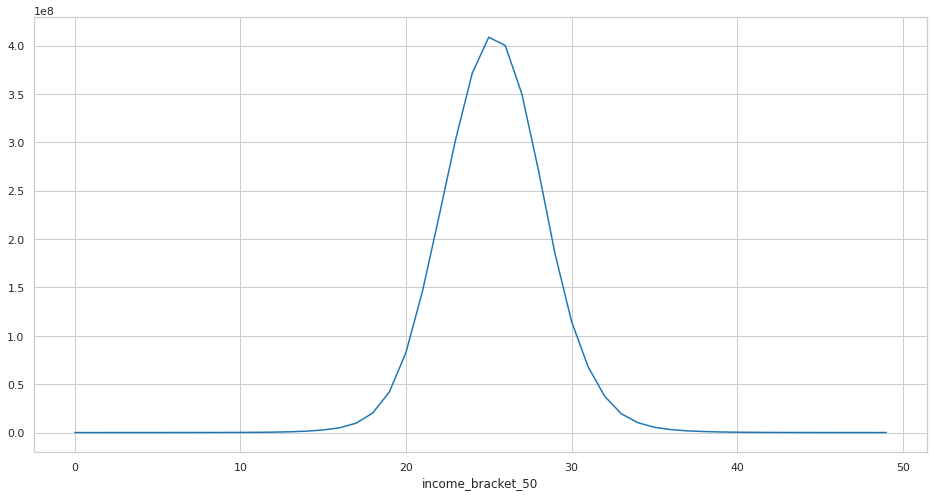

In [48]:
res_ig.loc['upper_middle_income', 2021].plot()

<AxesSubplot:xlabel='income_bracket_50'>

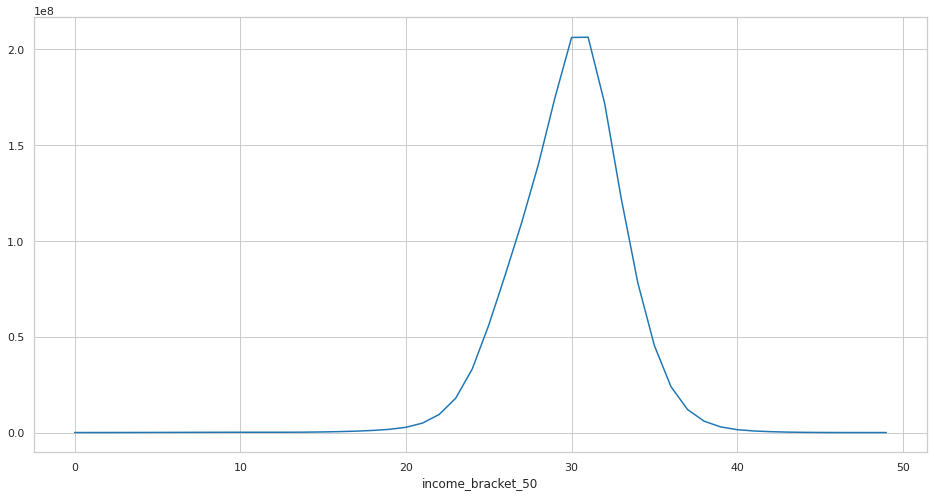

In [49]:
res_ig.loc['high_income', 2021].plot()

In [50]:
res_ig.unstack()

income_bracket_50         0     1     2     3      4      5      6      7   \
income_groups       time                                                     
high_income         1944   0     0     0     0      0      0      0      0   
                    1945   0     0     0     0      0      0      0      0   
                    1946   0     0     0     0      0      0      0      0   
                    1947   0     0     0     0      0      0      0      0   
                    1948   0     0     0     0      0      0      0      0   
...                       ..   ...   ...   ...    ...    ...    ...    ...   
upper_middle_income 2046   0  1469  4994  9061  16673  29585  47911  72537   
                    2047   0  1378  4812  8861  16379  29048  47431  72018   
                    2048   0  1475  4686  8674  16109  28573  47077  71624   
                    2049   0  1278  4351  8093  15186  27013  44842  67596   
                    2050   0  1100  4176  7884  14883  26512  44509  67256   

income_bracket_50             8       9   ...      40      41      42      43  \
income_groups       time                  ...                                   
high_income         1944       0       0  ...      11       6       3       1   
                    1945       0       0  ...      16       8       4       2   
                    1946       0       0  ...      22      11       6       3   
                    1947       0       0  ...      44      20      11       5   
                    1948       0       0  ...      57      26      13       7   
...                          ...     ...  ...     ...     ...     ...     ...   
upper_middle_income 2046  109715  167888  ...  704834  414050  246418  147794   
                    2047  108828  166072  ...  735708  432083  257219  154213   
                    2048  108056  164279  ...  767907  451241  268310  160982   
                    2049  101036  151794  ...  412160  252679  157307  101060   
                    2050  100392  150601  ...  430202  263151  163911  105024   

income_bracket_50            44     45     46     47     48     49  
income_groups       time                                            
high_income         1944      1      0      0      0      0      0  
                    1945      1      0      0      0      0      0  
                    1946      2      1      1      0      0      0  
                    1947      3      1      1      1      0      0  
                    1948      4      2      1      1      0      0  
...                         ...    ...    ...    ...    ...    ...  
upper_middle_income 2046  89736  56619  35734  22980  14670   9240  
                    2047  93444  58931  37147  23871  15242   9607  
                    2048  97424  61342  38654  24834  15866  10015  
                    2049  65709  43658  28791  19127  12434   7935  
                    2050  68332  45362  29970  19909  12978   8299  

[774 rows x 50 columns]

In [51]:
res_ig.unstack().apply(lambda r: r.astype(str).str.cat(sep=','), axis=1)

income_groups        time
high_income          1944    0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,5,10,17,34,70,...
                     1945    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,6,10,17,29,54,...
                     1946    0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,7,11,18,32,6...
                     1947    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,6,11,18,32...
                     1948    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,6,10,18,...
                                                   ...                        
upper_middle_income  2046    0,1469,4994,9061,16673,29585,47911,72537,10971...
                     2047    0,1378,4812,8861,16379,29048,47431,72018,10882...
                     2048    0,1475,4686,8674,16109,28573,47077,71624,10805...
                     2049    0,1278,4351,8093,15186,27013,44842,67596,10103...
                     2050    0,1100,4176,7884,14883,26512,44509,67256,10039...
Length: 774, dtype: object

In [52]:
def concat_values(ser):
    res = ser.unstack().apply(lambda r: r.astype(str).str.cat(sep=','), axis=1)
    res.name = 'income_mountain_50bracket_shape_for_log'
    return res

In [53]:
res_ig

income_groups        time  income_bracket_50
high_income          1944  0                        0
                           1                        0
                           2                        0
                           3                        0
                           4                        0
                                                ...  
upper_middle_income  2050  45                   45362
                           46                   29970
                           47                   19909
                           48                   12978
                           49                    8299
Name: population, Length: 38700, dtype: int64

In [54]:
max_heights['income_groups'] = res_ig.groupby('income_groups').max()

In [55]:
res_ig = concat_values(res_ig)

In [56]:
res_ig.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_groups--time.csv')

In [57]:
_d = income_3groups['level'].to_dict()

In [58]:
ig3 = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [59]:
df['income_3groups'] = ig3

In [60]:
res_ig3 = df.groupby(by=['income_3groups', 'time', 'income_bracket_50'])['population'].sum()

In [61]:
max_heights['income_3groups'] = res_ig3.groupby('income_3groups').max()

In [62]:
res_ig3 = concat_values(res_ig3)

In [63]:
res_ig3

income_3groups  time
high_income     1944    0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,5,10,17,34,70,...
                1945    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,6,10,17,29,54,...
                1946    0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,7,11,18,32,6...
                1947    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,6,11,18,32...
                1948    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,6,10,18,...
                                              ...                        
middle_income   2046    718,5570,18430,35303,59142,94751,147194,225921...
                2047    579,5187,17743,34855,58748,94063,146218,224228...
                2048    464,5035,18005,37949,64554,102467,157979,24003...
                2049    5063,11603,26996,51645,85186,133608,207397,318...
                2050    4861,11040,25955,50759,84244,132143,205343,314...
Name: income_mountain_50bracket_shape_for_log, Length: 609, dtype: object

In [64]:
res_ig3.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_3groups--time.csv')

In [65]:
res_ig3.at[('middle_income', 2050)]

'4861,11040,25955,50759,84244,132143,205343,314956,486241,767427,1245325,2074478,3528085,6130829,10642612,18355298,31388885,53434714,89986136,144256368,214575265,299596550,405490218,553258127,695873647,723924631,613399673,449919024,303858584,198448191,123860734,74115197,43167567,24612166,13939464,7825883,4398675,2475244,1415006,834326,501333,309952,194562,124965,81105,53411,34946,22918,14749,9310'

In [66]:
countries = pd.read_csv('../../../ddf--open_numbers/ddf--entities--geo--country.csv')

In [67]:
# g77_and_oecd_countries

In [68]:
k = 'g77_and_oecd_countries'

In [69]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [70]:
# this one missing in open_numbers ontology
_d['ssd'] = 'g77'

In [71]:
def _f(x):
    try:
        return _d[x]
    except KeyError:
        print(x)
        return None
df[k] = df['geo'].map(_f)

In [72]:
res_g77 = df.groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [74]:
max_heights[k] = res_g77.groupby(k).max()

In [75]:
res_g77 = concat_values(res_g77)

In [76]:
res_g77

g77_and_oecd_countries  time
g77                     1800    291497,421219,570041,768699,1041623,1445406,20...
                        1801    293659,423976,573672,773497,1048132,1454676,20...
                        1802    295795,426690,577256,778223,1054512,1463719,21...
                        1803    297707,429203,580600,782693,1060619,1472443,21...
                        1804    300148,432334,584765,788265,1068222,1483267,21...
                                                      ...                        
others                  2046    0,2,32,76,150,287,444,668,962,1363,2060,2997,4...
                        2047    0,2,30,74,149,289,450,675,967,1361,2037,2959,4...
                        2048    0,0,29,71,142,281,444,666,957,1347,2006,2909,4...
                        2049    0,0,23,67,133,273,435,654,945,1323,1959,2835,4...
                        2050    0,0,21,62,125,266,427,646,930,1302,1913,2763,3...
Name: income_mountain_50bracket_shape_for_log, Length: 753, dtype: ob

In [77]:
res_g77.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--g77_and_oecd_countries--time.csv')

In [86]:
# global

In [78]:
df['global'] = 'world'

In [79]:
res_glob = df.groupby(by=['global', 'time', 'income_bracket_50'])['population'].sum()

In [80]:
max_heights['global'] = res_glob.groupby('global').max()

In [81]:
res_glob = concat_values(res_glob)

In [82]:
res_glob

global  time
world   1800    346840,511066,708745,983502,1356437,1906086,27...
        1801    349392,514463,713278,989657,1364991,1918369,27...
        1802    351257,516647,716444,993882,1370885,1926786,27...
        1803    353265,519120,720093,999039,1378046,1937066,28...
        1804    355577,521633,723777,1004115,1385084,1947232,2...
                                      ...                        
        2046    5748,14845,49367,90978,146138,223448,337108,50...
        2047    5510,13934,48640,91326,147255,224328,337343,50...
        2048    5298,13229,45520,87606,142385,217426,327953,49...
        2049    5071,12191,42417,85426,140005,214027,323240,48...
        2050    4868,11514,40163,83469,137726,210781,318692,47...
Name: income_mountain_50bracket_shape_for_log, Length: 251, dtype: object

In [83]:
res_glob.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--global--time.csv')

In [84]:
# landlocked

In [85]:
_d = countries.set_index('country')['landlocked'].dropna().to_dict()

In [86]:
def _f(x):
    try:
        return _d[x]
    except KeyError:
        print(x)
        return None
df['landlocked'] = df['geo'].map(_f)

In [87]:
res_llock = df.groupby(by=['landlocked', 'time', 'income_bracket_50'])['population'].sum()

In [98]:
res_llock

landlocked  time  income_bracket_50
coastline   1800  0                     326234
                  1                     482412
                  2                     669785
                  3                     930336
                  4                    1282576
                                        ...   
landlocked  2050  45                      8316
                  46                      4950
                  47                      2806
                  48                      1561
                  49                       900
Name: population, Length: 25100, dtype: int64

In [100]:
max_heights['landlocked'] = res_llock.reset_index().groupby('landlocked')['population'].max()

In [101]:
res_llock = concat_values(res_llock)

In [102]:
res_llock.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--landlocked--time.csv')

In [103]:
# main_religion_2008

In [104]:
k = 'main_religion_2008'

In [105]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [106]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [107]:
missing

{'ben',
 'bih',
 'caf',
 'civ',
 'gnb',
 'isr',
 'kor',
 'lbn',
 'lbr',
 'mdg',
 'mng',
 'mus',
 'nga',
 'prk',
 'sle',
 'ssd',
 'tgo'}

In [108]:
countries[k].unique()

array([nan, 'christian', 'muslim', 'eastern_religions'], dtype=object)

In [109]:
res_rel = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [110]:
max_heights[k] = res_rel.groupby(k).max()

In [111]:
res_rel = concat_values(res_rel)

In [112]:
res_rel

main_religion_2008  time
christian           1800    68855,110405,164966,244575,351960,507995,74873...
                    1801    69253,111073,165884,245886,353900,510821,75283...
                    1802    68950,110528,165418,245285,353237,509926,75160...
                    1803    69041,110503,165737,245939,354220,511358,75371...
                    1804    68875,109856,165218,245351,353502,510474,75262...
                                                  ...                        
muslim              2046    0,245,981,2168,4016,6544,10327,16071,25735,428...
                    2047    0,206,951,2110,3958,6443,10211,15857,25322,419...
                    2048    0,176,929,2067,3782,6132,9768,15217,24386,4044...
                    2049    0,150,889,2000,3728,6052,9654,15002,23971,3953...
                    2050    0,110,843,1915,3649,5926,9484,14725,23473,3860...
Name: income_mountain_50bracket_shape_for_log, Length: 753, dtype: object

In [113]:
res_rel.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--main_religion_2008--time.csv')

In [114]:
# unhcr_region

In [115]:
k = 'unhcr_region'

In [116]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [117]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [118]:
missing

{'twn'}

In [119]:
res_ur = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [120]:
max_heights[k] = res_ur.groupby(k).max()

In [121]:
res_ur = concat_values(res_ur)

In [122]:
res_ur

unhcr_region               time
unhcr_americas             1800    6548,10983,16626,24531,34879,49208,69739,10049...
                           1801    6592,11052,16696,24656,35072,49499,70172,10117...
                           1802    6626,11140,16811,24796,35312,49851,70702,10202...
                           1803    6702,11255,17009,25129,35739,50438,71534,10326...
                           1804    6728,11325,17119,25320,36023,50856,72183,10431...
                                                         ...                        
unhcr_west_central_africa  2046    3,87,2429,6793,12273,19659,30151,46324,72079,1...
                           2047    3,70,2110,6573,12019,19327,29665,45605,70777,1...
                           2048    3,64,1852,6255,11415,18419,28399,43838,68236,1...
                           2049    2,60,1589,6044,11211,18169,28072,43288,67250,1...
                           2050    2,57,1285,5808,10969,17864,27686,42683,66231,1...
Name: income_mountain_50bracket_s

In [123]:
res_ur.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unhcr_region--time.csv')

In [124]:
# unicef_region

In [125]:
k = 'unicef_region'

In [126]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [127]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [128]:
missing

{'hkg', 'twn'}

In [129]:
res_unr = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [130]:
max_heights[k] = res_unr.groupby(k).max()

In [131]:
res_unr = concat_values(res_unr)

In [132]:
res_unr

unicef_region  time
eap            1800    244537,352502,474992,639889,857085,1170471,165...
               1801    246614,355122,478462,644528,863418,1179533,166...
               1802    248689,357731,481924,649117,869632,1188332,167...
               1803    250510,360096,485080,653370,875448,1196641,168...
               1804    252663,362805,488657,658149,881956,1205938,170...
                                             ...                        
ssa            2046    745,6433,25223,49002,78845,121983,185604,28443...
               2047    603,6025,25532,50760,81882,125769,190166,28898...
               2048    484,5638,23442,48448,78831,121543,184766,28135...
               2049    348,5012,22159,47653,78234,120623,183663,27900...
               2050    240,4466,21015,47008,77743,119829,182800,27706...
Name: income_mountain_50bracket_shape_for_log, Length: 1757, dtype: object

In [133]:
res_unr.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unicef_region--time.csv')

In [134]:
# un_sdg_ldc

In [135]:
k = 'un_sdg_ldc'

In [136]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [137]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [138]:
missing

set()

In [139]:
res_usl = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [140]:
max_heights[k] = res_usl.groupby(k).max()

In [141]:
res_usl = concat_values(res_usl)

In [142]:
res_usl

un_sdg_ldc              time
un_least_developed      1800    18959,27125,38919,60011,87711,131105,202147,32...
                        1801    18957,27122,38901,59973,87644,130979,201910,32...
                        1802    18916,27076,38847,59907,87547,130823,201643,32...
                        1803    18900,27057,38823,59882,87511,130768,201540,32...
                        1804    18884,27041,38789,59845,87437,130619,201237,32...
                                                      ...                        
un_not_least_developed  2046    5015,8501,24416,42460,68467,106323,161586,2401...
                        2047    4915,7996,23321,41014,66446,103075,157087,2337...
                        2048    4820,7680,22303,39534,64474,99974,152871,22752...
                        2049    4726,7264,20478,38126,62583,97057,149009,22209...
                        2050    4630,7130,19320,36769,60696,94145,145077,21648...
Name: income_mountain_50bracket_shape_for_log, Length: 502, dtype: ob

In [143]:
res_usl.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_ldc--time.csv')

In [131]:
# un_sdg_region

In [144]:
k = 'un_sdg_region'

In [145]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [146]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [147]:
missing

set()

In [148]:
res_usr = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [149]:
max_heights[k] = res_usr.groupby(k).max()

In [150]:
res_usr = concat_values(res_usr)

In [151]:
res_usr

un_sdg_region                 time
un_australia_and_new_zealand  1800    14,23,35,55,85,139,244,462,935,1937,3937,7780,...
                              1801    13,22,35,52,82,133,232,440,890,1849,3775,7483,...
                              1802    13,21,34,51,79,129,225,425,857,1780,3641,7226,...
                              1803    12,21,32,49,78,125,219,410,826,1714,3513,6984,...
                              1804    12,21,31,49,75,122,211,396,794,1648,3383,6735,...
                                                            ...                        
un_sub_saharan_africa         2046    745,6414,25105,48795,78525,121524,184981,28363...
                              2047    603,6007,25418,50558,81567,125315,189547,28818...
                              2048    484,5621,23332,48251,78522,121097,184156,28056...
                              2049    348,4996,22054,47461,77937,120194,183076,27823...
                              2050    240,4466,20914,46821,77452,119406,182219,27630.

In [152]:
res_usr.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_region--time.csv')

In [153]:
# west_and_rest

In [154]:
k = 'west_and_rest'

In [155]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [156]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [157]:
missing

{'hkg', 'twn'}

In [158]:
res_war = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [159]:
max_heights[k] = res_war.groupby(k).max()

In [160]:
res_war = concat_values(res_war)

In [161]:
res_war

west_and_rest  time
rest           1800    333633,480073,653634,895280,1225207,1717998,24...
               1801    335848,482906,657387,900307,1232064,1727807,25...
               1802    338050,485715,661143,905312,1238870,1737501,25...
               1803    340023,488333,664680,910153,1245596,1747226,25...
               1804    342498,491515,668935,915911,1253489,1758502,25...
                                             ...                        
west           2046    0,395,7259,13467,21514,32104,46381,63747,83854...
               2047    0,309,6836,12866,20757,31050,45008,62109,81988...
               2048    0,286,6434,12268,20005,30000,43643,60477,80126...
               2049    0,0,5344,11682,19274,28981,42302,58871,78275,9...
               2050    0,0,4983,11125,18574,28003,41003,57304,76433,9...
Name: income_mountain_50bracket_shape_for_log, Length: 502, dtype: object

In [162]:
res_war.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--west_and_rest--time.csv')

In [164]:
# world_4region

In [165]:
k = 'world_4region'

In [166]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [167]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [168]:
missing

set()

In [169]:
res_w4r = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [170]:
max_heights[k] = res_w4r.groupby(k).max()

In [171]:
res_w4r = concat_values(res_w4r)

In [172]:
res_w4r

world_4region  time
africa         1800    26239,38591,55247,84311,125207,190988,299418,4...
               1801    26231,38583,55221,84261,125129,190845,299165,4...
               1802    26185,38531,55158,84189,125025,190705,298947,4...
               1803    26157,38504,55122,84150,124983,190657,298860,4...
               1804    26365,38797,55557,84766,125845,191843,300468,4...
                                             ...                        
europe         2046    0,494,3403,5577,7641,9719,11897,14343,17164,20...
               2047    0,309,3208,5361,7419,9472,11621,14020,16796,19...
               2048    0,286,3031,5148,7198,9228,11349,13709,16447,19...
               2049    0,0,2811,4932,6978,8984,11074,13389,16091,1918...
               2050    0,0,2508,4719,6761,8742,10802,13077,15738,1877...
Name: income_mountain_50bracket_shape_for_log, Length: 1004, dtype: object

In [173]:
res_w4r.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--world_4region--time.csv')

In [175]:
# world_6region

In [176]:
k = 'world_6region'

In [177]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [178]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [179]:
missing

set()

In [180]:
res_w6r = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [182]:
max_heights[k] = res_w6r.groupby(by=k).max()

In [183]:
res_w6r = concat_values(res_w6r)

In [184]:
res_w6r

world_6region       time
america             1800    6548,10983,16626,24531,34879,49208,69739,10049...
                    1801    6592,11052,16696,24656,35072,49499,70172,10117...
                    1802    6626,11140,16811,24796,35312,49851,70702,10202...
                    1803    6702,11255,17009,25129,35739,50438,71534,10326...
                    1804    6728,11325,17119,25320,36023,50856,72183,10431...
                                                  ...                        
sub_saharan_africa  2046    745,6433,25223,49001,78843,121978,185593,28441...
                    2047    603,6025,25532,50759,81880,125765,190156,28896...
                    2048    484,5638,23442,48448,78830,121539,184756,28133...
                    2049    348,5012,22159,47653,78233,120619,183654,27897...
                    2050    240,4466,21015,47008,77742,119825,182791,27704...
Name: income_mountain_50bracket_shape_for_log, Length: 1506, dtype: object

In [185]:
res_w6r.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--world_6region--time.csv')

In [163]:
# now also update the max heights for all groups!

In [186]:
df

,geo,time,income_bracket_50,population,income_groups,income_3groups,g77_and_oecd_countries,global,landlocked,main_religion_2008,unhcr_region,unicef_region,un_sdg_ldc,un_sdg_region,west_and_rest,world_4region,world_6region
0,afg,1800,0,35,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
1,afg,1800,1,56,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
2,afg,1800,2,92,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
3,afg,1800,3,154,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
4,afg,1800,4,266,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447245,zwe,2050,45,443,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447246,zwe,2050,46,255,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447247,zwe,2050,47,139,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447248,zwe,2050,48,71,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa


In [187]:
df.columns

Index(['geo', 'time', 'income_bracket_50', 'population', 'income_groups',
       'income_3groups', 'g77_and_oecd_countries', 'global', 'landlocked',
       'main_religion_2008', 'unhcr_region', 'unicef_region', 'un_sdg_ldc',
       'un_sdg_region', 'west_and_rest', 'world_4region', 'world_6region'],
      dtype='object')

In [188]:
# country
k = 'country'
ent = pd.read_csv(f'../../ddf--entities--geo--{k}.csv', dtype=str).set_index(k)
mh = max_heights['country']

In [189]:
ent.columns

Index(['set', 'g77_and_oecd_countries', 'income_groups', 'is--country',
       'iso3166_1_alpha2', 'unicode_region_subtag', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'un_state', 'world_4region',
       'world_6region', 'unicef_region', 'income_3groups', 'un_sdg_region',
       'un_sdg_ldc', 'unhcr_region', 'west_and_rest',
       'income_mountain_50bracket_max_height_for_log'],
      dtype='object')

In [190]:
ent.loc[mh.index, 'income_mountain_50bracket_max_height_for_log'] = mh.astype(str)

In [191]:
ent.to_csv(f'../../ddf--entities--geo--{k}.csv')

In [192]:
# others
for k in ['income_groups',
       'income_3groups', 'g77_and_oecd_countries', 'global', 'landlocked', 'main_religion_2008',
       'unhcr_region', 'unicef_region', 'un_sdg_ldc', 'un_sdg_region',
       'west_and_rest', 'world_4region', 'world_6region']:
    fn = f'../../ddf--entities--geo--{k}.csv'
    ent = pd.read_csv(fn, dtype=str).set_index(k)
    mh = max_heights[k]
    ent.loc[mh.index, 'income_mountain_50bracket_max_height_for_log'] = mh.astype(str)
    ent.to_csv(fn)